# SPAM Detection With Bayesian Network

In [2]:
# Importing Libs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Download and Read DataSet

In [6]:
# Read DataSet
df = pd.read_csv('https://raw.githubusercontent.com/NStugard/Intro-to-Machine-Learning/main/spam.csv')
# Output printing out first 5 columns
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Simplify Category
df['Category'] = df.Category.map({'ham':0,'spam':1})

df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Analysis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], random_state=1)

print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Rows to Train: {}'.format(X_train.shape[0]))
print('Number of Rows to Test: {}'.format(X_test.shape[0]))

Number of Rows: 5572
Number of Rows to Train: 4179
Number of Rows to Test: 1393


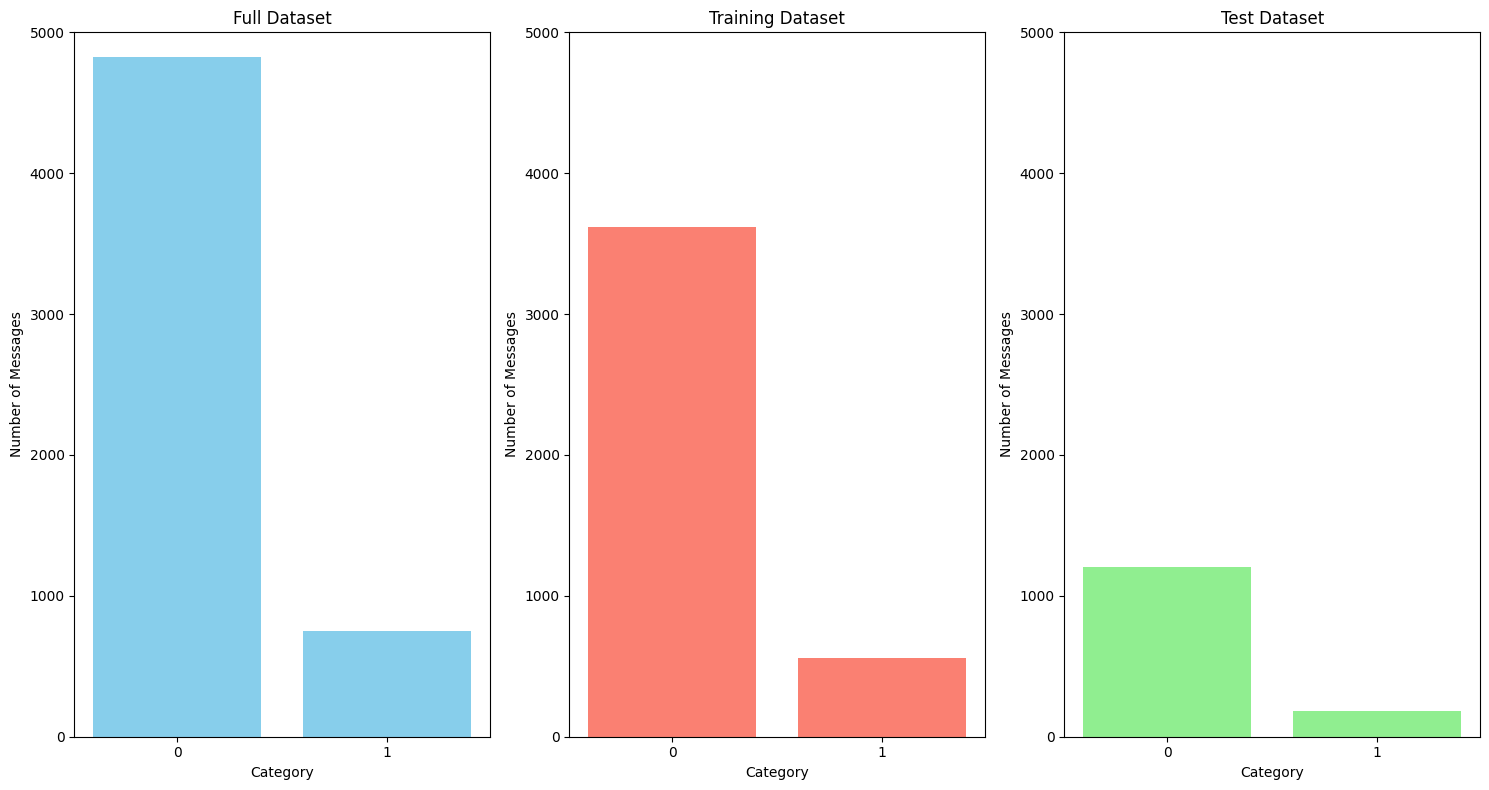

In [21]:
# Contar o número de ocorrências para cada categoria
category_counts = df['Category'].value_counts()
# Contar o número de ocorrências para cada categoria
train_category_counts = y_train.value_counts()
# Contar o número de ocorrências para cada categoria
test_category_counts = y_test.value_counts()

# Criar uma figura com três subplots em uma linha
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Gráfico para os dados completos
axs[0].bar(category_counts.index, category_counts.values, color='skyblue')
axs[0].set_title('Full Dataset')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Number of Messages')
axs[0].set_ylim((0,5000))
axs[0].set_xticks([0, 1])

# Gráfico para os dados de treinamento
axs[1].bar(train_category_counts.index, train_category_counts.values, color='salmon')
axs[1].set_title('Training Dataset')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Number of Messages')
axs[1].set_ylim((0,5000))
axs[1].set_xticks([0, 1])

# Gráfico para os dados de teste
axs[2].bar(test_category_counts.index, test_category_counts.values, color='lightgreen')
axs[2].set_title('Test Dataset')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Number of Messages')
axs[2].set_ylim((0,5000))
axs[2].set_xticks([0, 1])

# Ajustar o layout dos subplots
plt.tight_layout()

# Mostrar os subplots
plt.show()


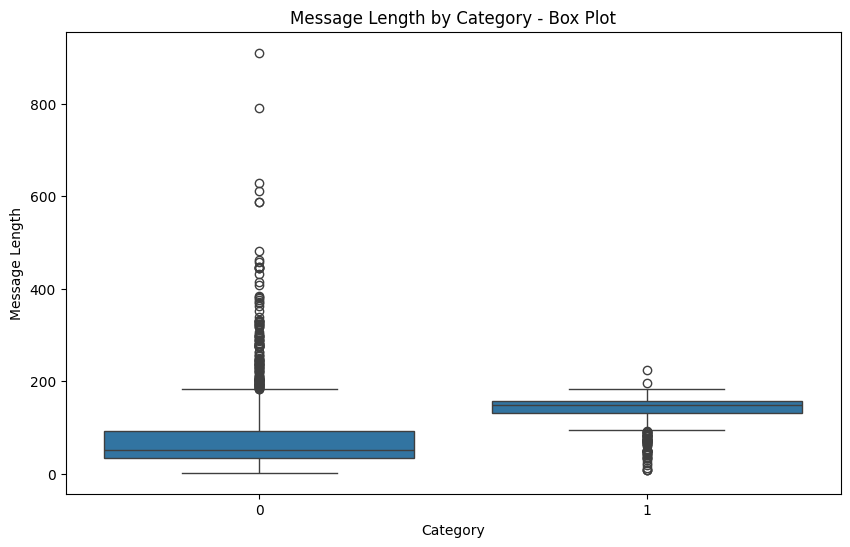

In [24]:
# Análise de comprimento das mensagens
df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Message_Length', data=df)
plt.title('Message Length by Category - Box Plot')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()

## Pre-processing of data using CountVectorizer Method


Purpose:
The **CountVectorizer** is a preprocessing step commonly used in Natural Language Processing (NLP) tasks, especially when working with machine learning models that handle text data.

Usage:
Instantiate the **CountVectorizer** method:
count_vector = CountVectorizer()

Fit the training data and return the matrix:
training_data = count_vector.fit_transform(X_train)

Transform testing data and return the matrix:
testing_data = count_vector.transform(X_test)

Description:
The **CountVectorizer** converts a collection of text documents into a matrix of token counts. This process involves the following steps:

1. Instantiate the **CountVectorizer** object:
   - This step initializes the **CountVectorizer** object, which is a class provided by the scikit-learn library.

2. Fit the training data:
   - The **CountVectorizer** is fit to the training data (X_train). This step involves learning the vocabulary (i.e., all unique words) from the training documents and transforming them into count vectors.
   - The resulting matrix is a sparse matrix where each row represents a document and each column represents a word from the vocabulary. The values indicate how many times each word appears in each document.

3. Transform testing data:
   - The testing data (X_test) is transformed into count vectors using the **CountVectorizer** that was fitted with the training data. This step ensures that the same vocabulary learned from the training data is used for transforming the testing data.

Benefits:
- Converts raw text data into a numerical representation that can be used by machine learning algorithms for training and prediction.
- Enables machine learning models to process text data, as most algorithms require numeric input.
- Provides a way to encode text data into a numerical form that models can understand.

In [7]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix.
testing_data = count_vector.transform(X_test)

In [8]:
# Crie um DataFrame para os dados de treinamento e teste após a vetorização
train_vectorized_df = pd.DataFrame(training_data.toarray(), columns=count_vector.get_feature_names_out())
test_vectorized_df = pd.DataFrame(testing_data.toarray(), columns=count_vector.get_feature_names_out())

In [9]:
train_vectorized_df.head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_vectorized_df.head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Instantiating a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Fitting the classifier to the training data
# training_data: The preprocessed text data converted into numerical form using CountVectorizer
# y_train: The target labels corresponding to the training data
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [12]:
predictions = naive_bayes.predict(testing_data)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('Precision score: ', format(precision_score(y_test,predictions)))
print('Recall score: ', format(recall_score(y_test,predictions)))
print('F1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9877961234745154
Precision score:  0.9719101123595506
Recall score:  0.9351351351351351
F1 score:  0.953168044077135


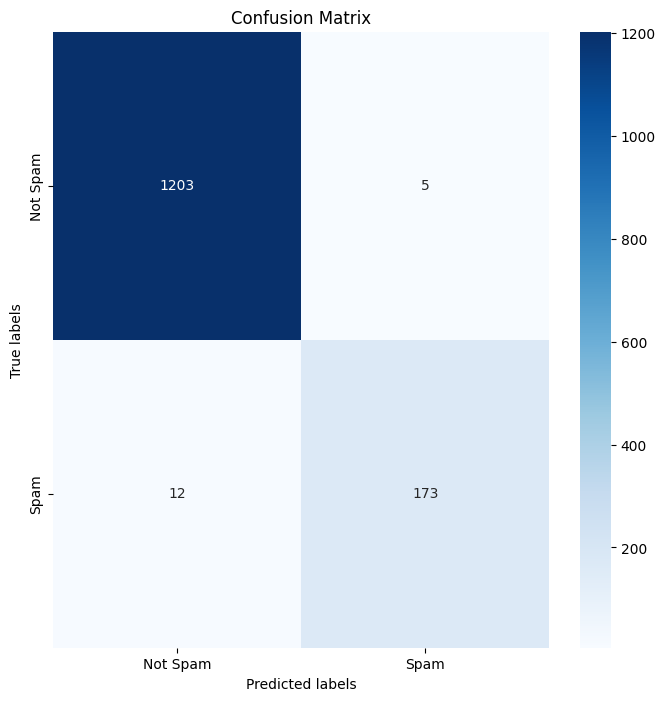

In [16]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], 
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()